# Bitcoin & Ethereum ETF Flow Analysis

## 🎯 Project Intent

Automated analysis of Bitcoin and Ethereum ETF flows, combining institutional flow data with cryptocurrency prices to identify investment patterns and market trends.

## 📊 Objective

Create a pipeline that:
1. **Collects real-time ETF flow data** from web sources
2. **Integrates cryptocurrency prices** for correlation analysis
3. **Generates visualizations** with trend analysis
4. **Outputs clean datasets** for further analysis

## 🛠 System Architecture

### Data Collection
- **Automated web data extraction** with anti-bot protection
- **Multi-format parsing** handling different table structures
- **Data cleaning** and validation
- **Retry mechanisms** for reliability

### Visualization
- **Dual-axis charts** showing flows and prices
- **Color-coded bars** (green inflows, red outflows)
- **LOWESS trend lines** with configurable smoothing
- **Gap preservation** for missing trading days

## 📈 Key Features

- **Multi-asset support**: Bitcoin and Ethereum ETFs
- **Individual fund tracking**: All major ETF providers (IBIT, FBTC, GBTC, etc.)
- **Price integration**: Automatic price data merging
- **Advanced plotting**: Flow trends with price overlays
- **Flexible configuration**: Verbose control, column selection, smoothing parameters

## 📁 Data Output

### CSV Files
- `bitcoin_etf_inflows.csv` / `ethereum_etf_inflows.csv` (raw flows)
- `bitcoin_etf_with_prices.csv` / `ethereum_etf_with_prices.csv` (with prices)

In [1]:
import pandas as pd
import sys

sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")

from functions_etf_inflows import (
    get_etf_flows,
    merge_etf_with_prices,
    plot_etf_flows,
    plot_etf_comparison,
)
from fetch_data import fetch_crypto_data

# 1. ETF data download + CSV export
bitcoin_df, ethereum_df = get_etf_flows(bitcoin=True, ethereum=True, verbose=False)

# 2. Merge with prices + CSV export
bitcoin_with_prices, ethereum_with_prices = merge_etf_with_prices(bitcoin_df, ethereum_df, fetch_crypto_data)

you are using nologin method, data you access may be limited


🔄 MERGING ETF DATA WITH PRICES
📈 Processing Bitcoin ETF with BTC prices...


✅ Merged BTC ETF with price data: 419 rows
📈 Processing Ethereum ETF with ETH prices...


✅ Merged ETH ETF with price data: 287 rows

📊 PRICE MERGE SUMMARY
✅ Bitcoin ETF with prices: 419 rows
   Columns: ['Date', 'IBIT', 'FBTC', 'BITB', 'ARKB', 'BTCO', 'EZBC', 'BRRR', 'HODL', 'BTCW', 'GBTC', 'BTC', 'Total', 'BTC_Price']
   Date range: 2024-01-11 to 2025-09-12
   💾 Saved to: ../data/etf_inflows/bitcoin_etf_with_prices.csv
✅ Ethereum ETF with prices: 287 rows
   Columns: ['Date', 'ETHA', 'FETH', 'ETHW', 'TETH', 'ETHV', 'QETH', 'EZET', 'ETHE', 'ETH', 'Total', 'ETH_Price']
   Date range: 2024-07-23 to 2025-09-12
   💾 Saved to: ../data/etf_inflows/ethereum_etf_with_prices.csv


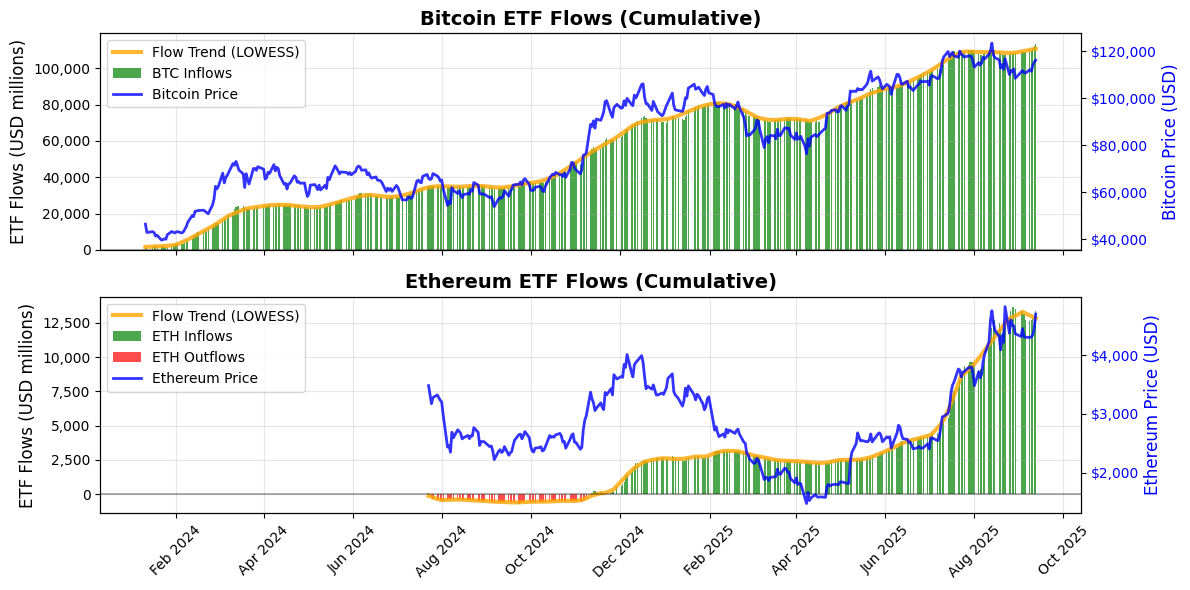

✅ Comparison plot complete!


In [2]:
lowess_frac = 0.05

plot_etf_comparison(bitcoin_df=bitcoin_with_prices,ethereum_df=ethereum_with_prices,cumulative=True,figsize=(12, 6),lowess_frac=lowess_frac)

📊 PLOTTING ETF FLOWS
📈 Plotting Bitcoin ETF flows...
✅ Found BTC_Price column for Bitcoin - will display price overlay


📄 Plot saved to: ../output/8.ETF_BTC_flows.jpg


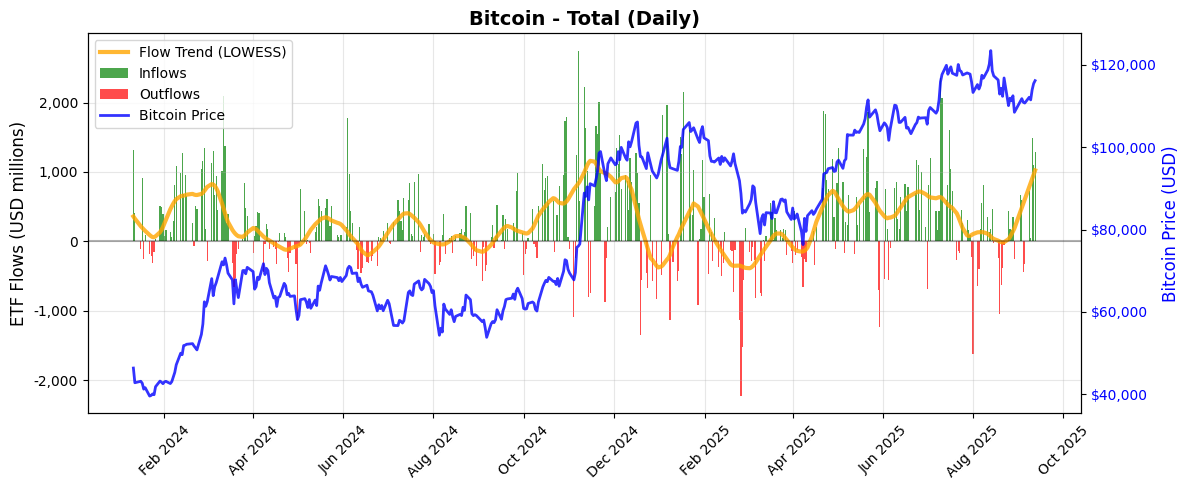

📈 Plotting Ethereum ETF flows...
✅ Found ETH_Price column for Ethereum - will display price overlay


📄 Plot saved to: ../output/8.ETF_ETH_flows.jpg


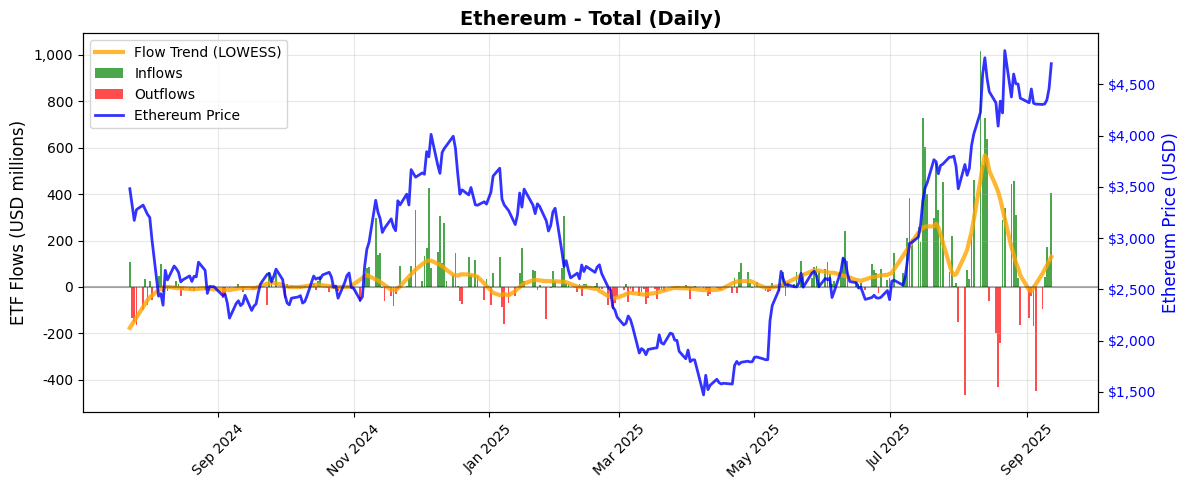

✅ Plotting complete!


In [3]:
plot_etf_flows(bitcoin_df=bitcoin_with_prices,ethereum_df=ethereum_with_prices,columns="total",cumulative=False,figsize=(12, 5),lowess_frac=lowess_frac,save_plots=True)

📊 PLOTTING ETF FLOWS
📈 Plotting Bitcoin ETF flows...
✅ Found BTC_Price column for Bitcoin - will display price overlay


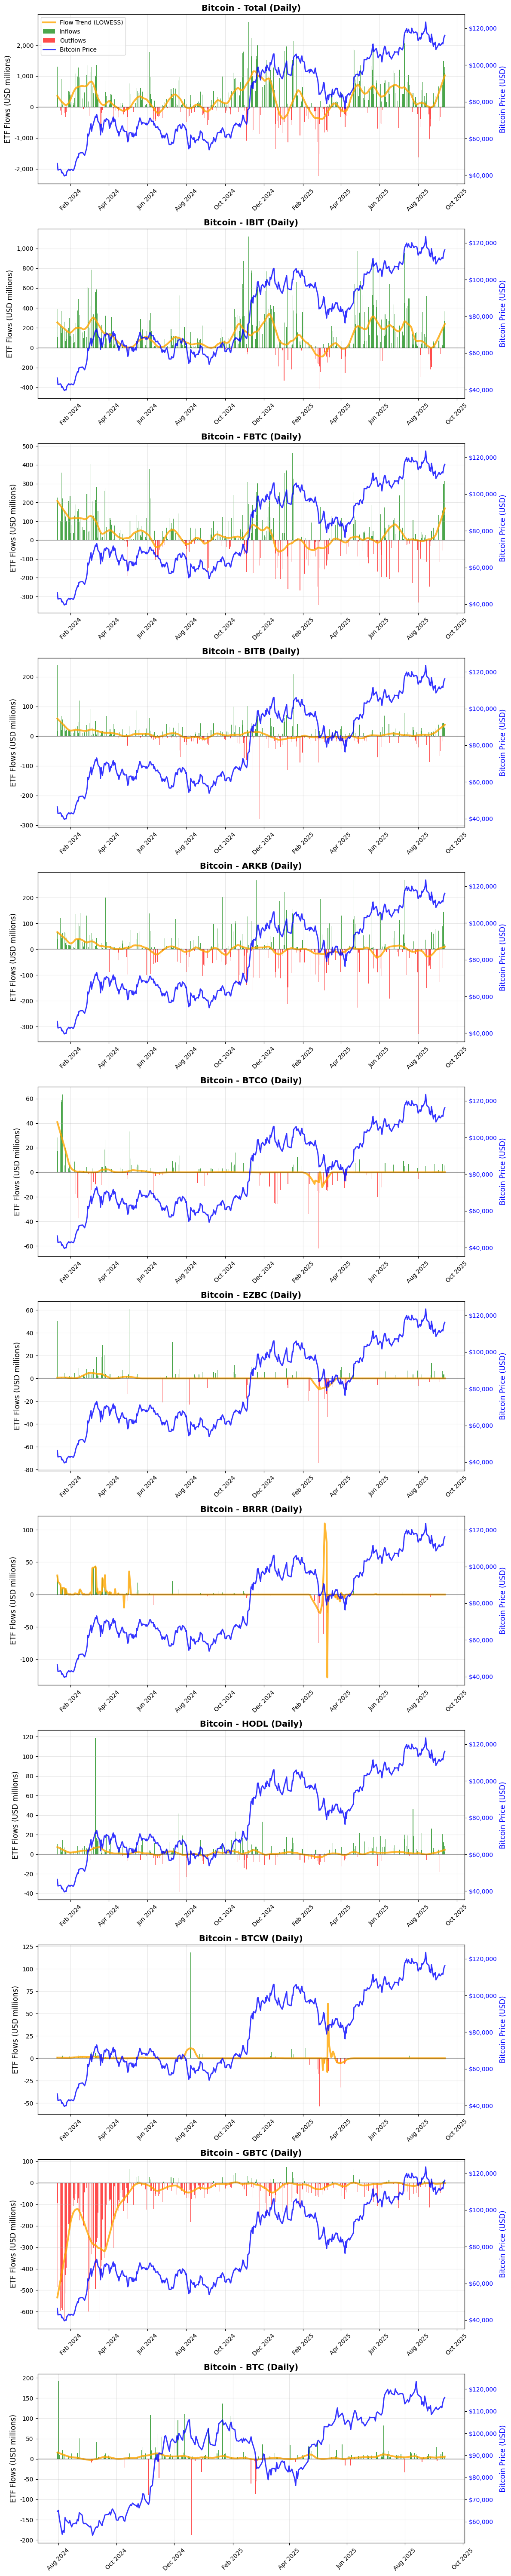

📈 Plotting Ethereum ETF flows...
✅ Found ETH_Price column for Ethereum - will display price overlay


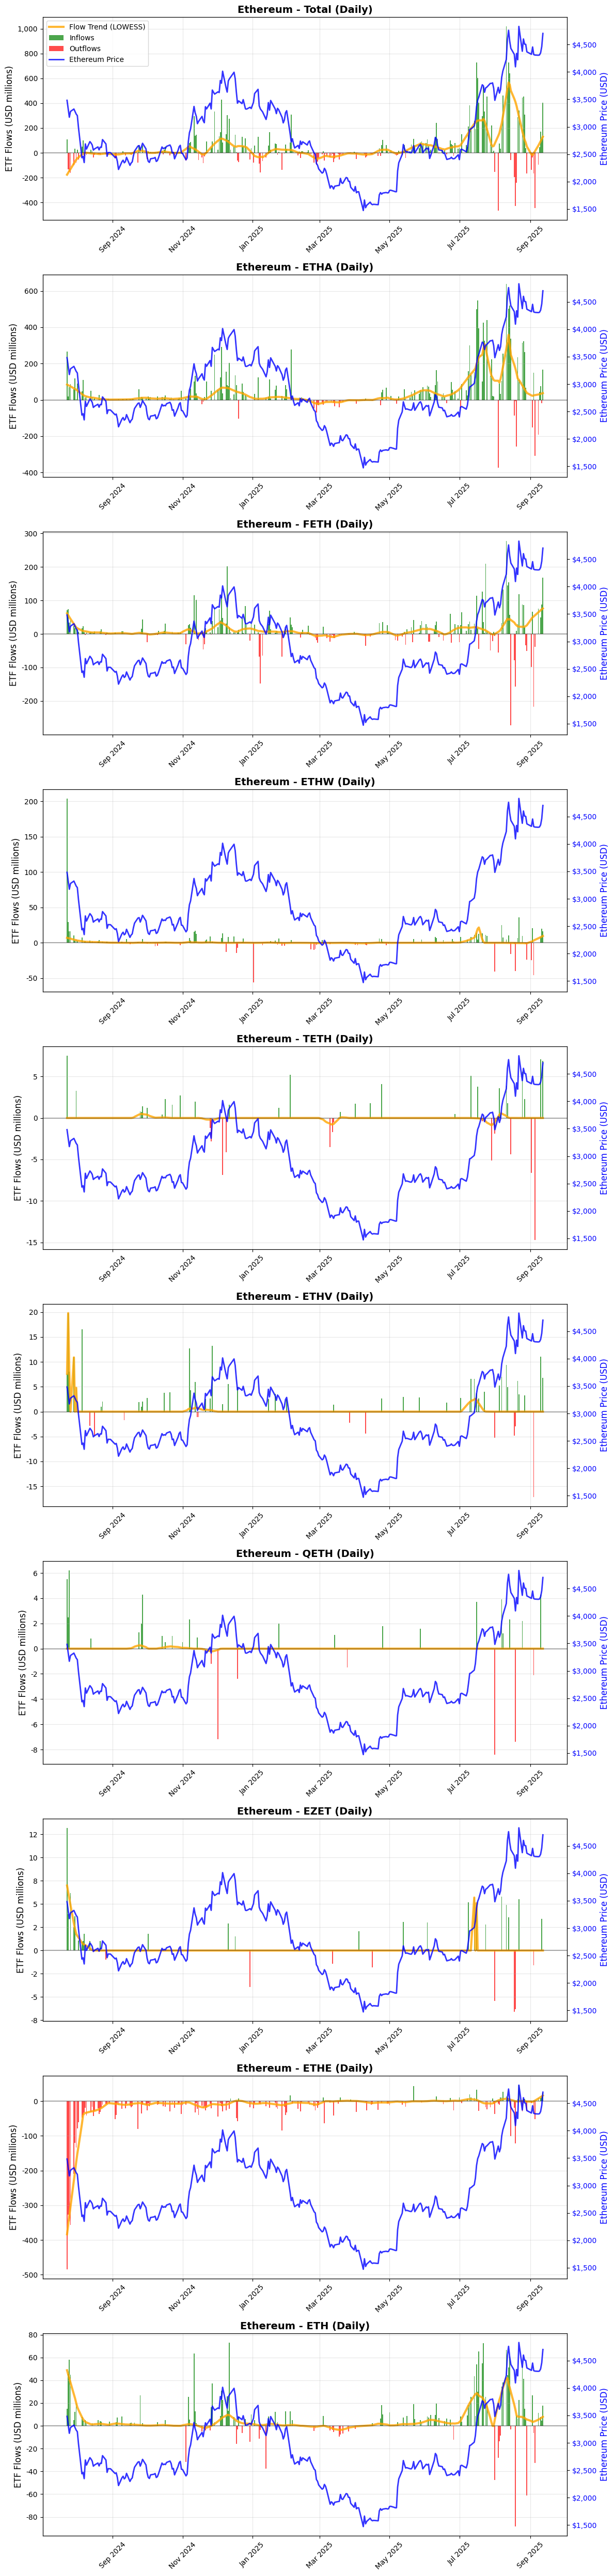

✅ Plotting complete!


In [4]:
plot_etf_flows(bitcoin_df=bitcoin_with_prices,ethereum_df=ethereum_with_prices,columns="all",cumulative=False,figsize=(12, 5),lowess_frac=lowess_frac,save_plots=False)